Q1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=2.7, random_state=42)

# Step 2: Perform KMeans clustering
kmeans = KMeans(
    n_clusters=3,
    init='random',      # Random initialization
    n_init=10,          # 10 variations of initial means
    max_iter=300,       # Maximum 300 iterations
    random_state=42
)

kmeans.fit(X)

# Step 3: Extract required information
sse = kmeans.inertia_                      # Sum of Squared Errors (Inertia)
centroids = kmeans.cluster_centers_       # Final centroid locations
iterations = kmeans.n_iter_               # Number of iterations to converge
predicted_labels = kmeans.labels_[:10]    # First 10 predicted labels

# Output
print("🔻 Lowest SSE (Inertia):", sse)
print("📍 Final Centroid Locations:\n", centroids)
print("🔁 Number of Iterations to Converge:", iterations)
print("🏷️ Predicted Labels for First 10 Points:", predicted_labels)


🔻 Lowest SSE (Inertia): 2582.9458720873313
📍 Final Centroid Locations:
 [[ 4.69097925  2.14914367]
 [-2.74273082  8.97295268]
 [-6.48129177 -6.71300879]]
🔁 Number of Iterations to Converge: 6
🏷️ Predicted Labels for First 10 Points: [0 1 2 2 2 2 1 2 1 2]


Q2

<ipython-input-2-666ac76790a1>:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K_range, sse, 'bo-', marker='o')
<ipython-input-2-666ac76790a1>:38: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K_range, silhouette_scores, 'go-', marker='o')


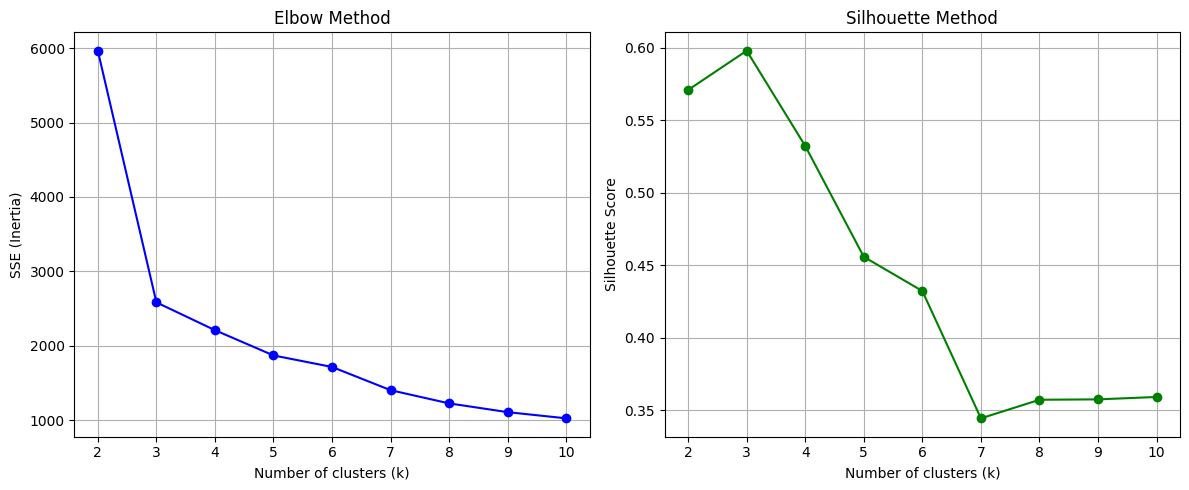

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=2.7, random_state=42)

# Step 2: Elbow and Silhouette Methods
sse = []
silhouette_scores = []
K_range = range(2, 11)  # Trying cluster values from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)

    # Elbow method: Store SSE
    sse.append(kmeans.inertia_)

    # Silhouette method: Store silhouette score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Step 3: Plot Elbow Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, sse, 'bo-', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.grid(True)

# Step 4: Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)

plt.tight_layout()
plt.show()


Silhouette Score: 0.5530074890174863
First 10 predicted labels: [0 1 0 0 0 0 2 0 1 0]


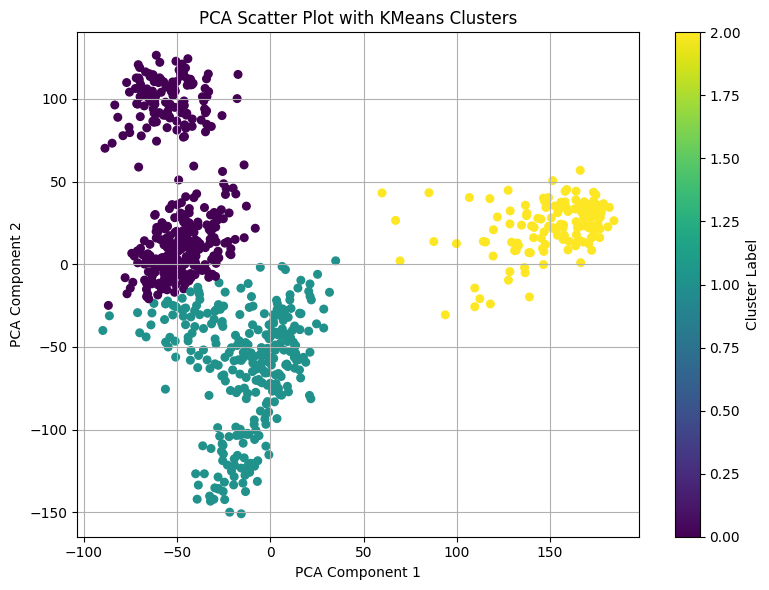

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data.csv", index_col=0)
true_labels = pd.read_csv("labels.csv", index_col=0)

# Step 1: PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Step 2: KMeans clustering
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_pca)
predicted_labels = kmeans.labels_

# Step 3: Silhouette Score
sil_score = silhouette_score(X_pca, predicted_labels)
print("Silhouette Score:", sil_score)

# Step 4: Show first 10 predicted labels
print("First 10 predicted labels:", predicted_labels[:10])

# Step 5: Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', s=30)
plt.title("PCA Scatter Plot with KMeans Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.tight_layout()
plt.show()


Train

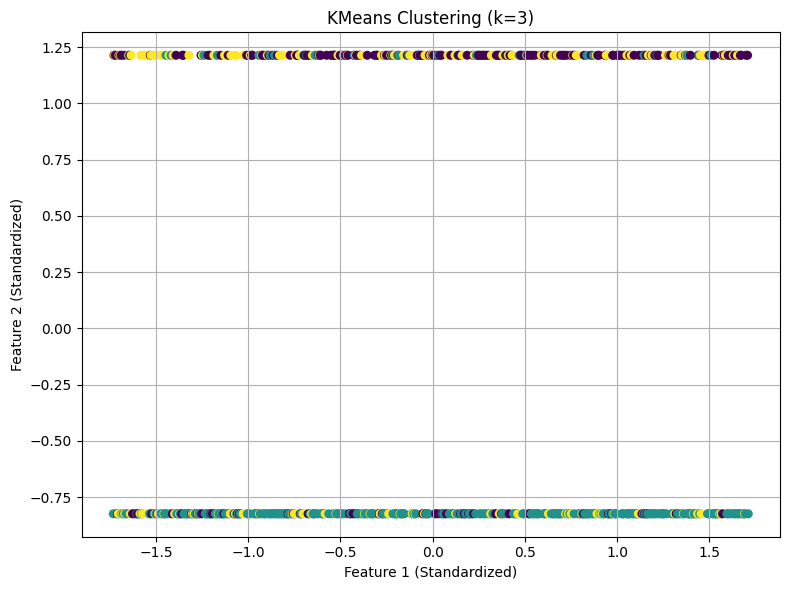

   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   103    1  22.0      1      0     407   
1            2         1       1   179    0  38.0      1      0     470   
2            3         1       3   317    0  26.0      0      0     531   
3            4         1       1   247    0  35.0      1      0      39   
4            5         0       3    15    1  35.0      0      0     372   

      Fare  Embarked  Cluster  
0   7.2500         2        1  
1  71.2833         0        0  
2   7.9250         2        2  
3  53.1000         2        0  
4   8.0500         2        1  


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")

# Step 1: Drop rows or columns with excessive missing values (optional threshold)
df = df.dropna(thresh=len(df) * 0.5, axis=1)  # drop columns with >50% missing
df = df.dropna()  # drop any remaining rows with missing values

# Step 2: Encode categorical features
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 3: Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Step 4: KMeans clustering with k-means++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Step 5: Add cluster labels to original data
df['Cluster'] = labels

# Step 6: Optional: plot clusters using first two features
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis', s=30)
plt.title("KMeans Clustering (k=3)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Output first few rows with clusters
print(df.head())


Test



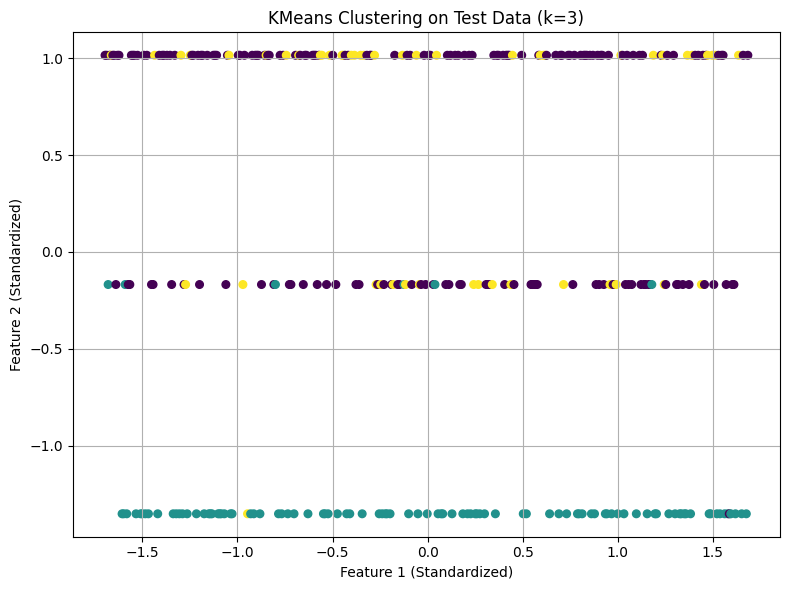

   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  \
0          892       3   182    1  34.5      0      0     128   7.8292   
1          893       3   318    0  47.0      1      0     181   7.0000   
2          894       2   220    1  62.0      0      0      63   9.6875   
3          895       3   322    1  27.0      0      0     124   8.6625   
4          896       3   159    0  22.0      1      1     115  12.2875   

   Embarked  Cluster  
0         1        0  
1         2        0  
2         1        1  
3         2        0  
4         2        2  


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load test dataset
df = pd.read_csv("test.csv")

# Step 1: Drop columns with >50% missing values and drop remaining NA rows
df = df.dropna(thresh=len(df) * 0.5, axis=1)
df = df.dropna()

# Step 2: Encode categorical features
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 3: Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Step 4: KMeans clustering (k=3) with k-means++ init
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Step 5: Add cluster labels
df['Cluster'] = labels

# Step 6: Scatter plot (first two principal features)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis', s=30)
plt.title("KMeans Clustering on Test Data (k=3)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Output first few clustered rows
print(df.head())
